In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import tensorflow as tf
import math
from sklearn import model_selection
import keras

from keras import layers
from keras import models
from keras import Model
from keras.datasets import mnist
from keras import backend as K
from keras import metrics
from keras import optimizers

K.tensorflow_backend._get_available_gpus()

# The Function used to plot the original image and the predicted image 
def Plot_Img(n,images,fig_w,fig_h):
    # n is how many digits we will display//
    plt.figure(figsize=(fig_w, fig_h))
    for i in range(n):
        # display images
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
    
# The Function used to remove the middle square of the image
def Img_incomp(imgs1,imgs2,start=9,end=22):
    n = imgs1.shape[0]
    patches = []
    for i in range(n):
        a = imgs2[i][start:end,start:end,:]
        patches.append(a)
        imgs1[i][start:end,start:end,:] = 0
    return imgs1,patches

h_dim = 1024
batch_size = 50
height = 32
width = 32
channels = 3

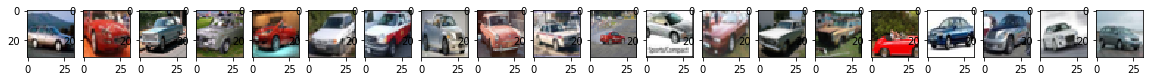

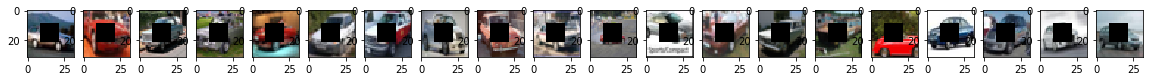

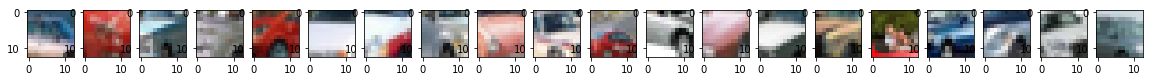

In [48]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train[y_train.flatten() == 1]
x_test = x_test[y_test.flatten() == 1]

# Normalize the pixels to 0 and 1 range
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

(x_tra,y_tra),(x_te,y_te) = keras.datasets.cifar10.load_data()
x_tra = x_tra[y_tra.flatten() == 1]
x_te = x_te[y_te.flatten() == 1]

# Normalize the pixels to 0 and 1 range
x_tra = x_tra.astype('float32') / 255.
x_te = x_te.astype('float32') / 255.

# Modfied training and testing imgs
x_train,x_train_patches = Img_incomp(x_train,x_tra)
x_test,x_test_patches = Img_incomp(x_test,x_te)
x_train_patches = np.array(x_train_patches)
x_test_patches = np.array(x_test_patches)

# Plot some examples
Plot_Img(20,x_tra,20,10)
Plot_Img(20,x_train,20,10)
Plot_Img(20,x_train_patches,20,10)
plt.show()

In [61]:
# Input
Input = layers.Input(batch_shape=(batch_size,height,width,channels))

# Encoder
l1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(Input)
l1 = layers.BatchNormalization()(l1)
l2 = layers.Conv2D(64,(3,3),activation='relu',strides=2,padding='same')(l1)
l2 = layers.BatchNormalization()(l2)
l3 = layers.Conv2D(128,(3,3),activation='relu',strides=2,padding='same')(l2)
l3 = layers.BatchNormalization()(l3)
l4 = layers.Conv2D(256,(3,3),activation='relu',strides=2,padding='same')(l3)
l4 = layers.BatchNormalization()(l4)
l5 = layers.Conv2D(h_dim,(3,3),activation='relu',strides=2)(l4)
encoder = Model(Input,l5)

# Decoder
d1 = layers.Conv2DTranspose(256,(3,3),activation='relu',strides=4)(l5)
d2 = layers.Conv2DTranspose(128,(3,3),activation='relu',strides=2)(d1)
d3 = layers.Conv2DTranspose(64,(3,3),activation='relu')(d2)
d4 = layers.Conv2DTranspose(3,(3,3),activation='sigmoid')(d3)
ae = Model(Input,d4)
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (50, 32, 32, 3)           0         
_________________________________________________________________
conv2d_89 (Conv2D)           (50, 32, 32, 32)          896       
_________________________________________________________________
batch_normalization_73 (Batc (50, 32, 32, 32)          128       
_________________________________________________________________
conv2d_90 (Conv2D)           (50, 16, 16, 64)          18496     
_________________________________________________________________
batch_normalization_74 (Batc (50, 16, 16, 64)          256       
_________________________________________________________________
conv2d_91 (Conv2D)           (50, 8, 8, 128)           73856     
_________________________________________________________________
batch_normalization_75 (Batc (50, 8, 8, 128)           512       
__________

In [62]:
ae_opt = optimizers.Adam(0.0005,0.5)
ae.compile(optimizer=ae_opt, loss='mean_squared_error')
ae.fit(x_train,x_train_patches,epochs=100,batch_size=batch_size)

Epoch 1/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0479
Epoch 2/100
5000/5000 [==============================] - 2s 408us/step - loss: 0.0392
Epoch 3/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0362
Epoch 4/100
5000/5000 [==============================] - 2s 412us/step - loss: 0.0337
Epoch 5/100
5000/5000 [==============================] - 2s 416us/step - loss: 0.0314
Epoch 6/100
5000/5000 [==============================] - 2s 412us/step - loss: 0.0293
Epoch 7/100
5000/5000 [==============================] - 2s 420us/step - loss: 0.0273
Epoch 8/100
5000/5000 [==============================] - 2s 420us/step - loss: 0.0259
Epoch 9/100
5000/5000 [==============================] - 2s 416us/step - loss: 0.0247
Epoch 10/100
5000/5000 [==============================] - 2s 424us/step - loss: 0.0238
Epoch 11/100
5000/5000 [==============================] - 2s 417us/step - loss: 0.0231
Epoch 12/100
5000/5000 [==============================

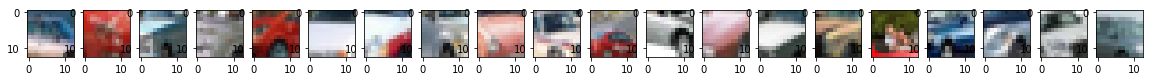

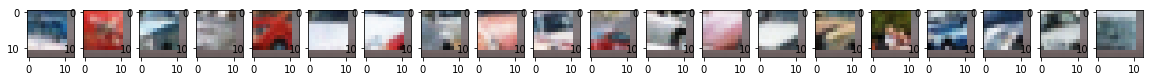

In [63]:
fill_train = ae.predict(x_train,batch_size=batch_size)
Plot_Img(20,x_train_patches,20,10)
Plot_Img(20,fill_train,20,10)
plt.show()

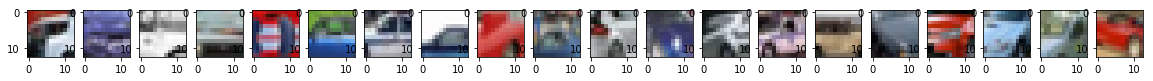

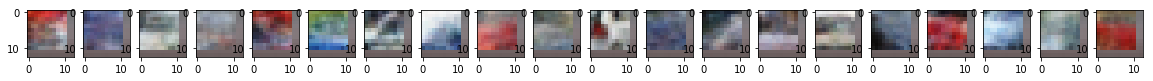

In [64]:
fill_test = ae.predict(x_test,batch_size=batch_size)
Plot_Img(20,x_test_patches,20,10)
Plot_Img(20,fill_test,20,10)
plt.show()

In [56]:
fill_train[0]

array([[[0.2785166 , 0.3436513 , 0.45590094],
        [0.27203232, 0.3502687 , 0.46431   ],
        [0.25557262, 0.33637702, 0.43784723],
        [0.27765557, 0.37100396, 0.4482442 ],
        [0.25026196, 0.37117738, 0.46024764],
        [0.20776182, 0.34496415, 0.43215677],
        [0.18701133, 0.31989807, 0.4289629 ],
        [0.18366951, 0.30633458, 0.42136675],
        [0.18082884, 0.29167226, 0.43913776],
        [0.20791614, 0.33446562, 0.4739692 ],
        [0.20718637, 0.3142295 , 0.4403746 ],
        [0.46778437, 0.47182637, 0.48007002],
        [0.47007954, 0.468834  , 0.47597495]],

       [[0.30437434, 0.38883254, 0.51555616],
        [0.29516566, 0.37282243, 0.48853192],
        [0.27129948, 0.33424097, 0.43085483],
        [0.23551002, 0.31162155, 0.385674  ],
        [0.27987605, 0.39425564, 0.47167787],
        [0.26272324, 0.40770426, 0.4954525 ],
        [0.23272872, 0.3585117 , 0.48802415],
        [0.25559473, 0.39215043, 0.54904187],
        [0.24658424, 0.35370594,